In [1]:
from PIL import Image
import numpy as np
import Img2Arr
import SolveSudoku_OS as SolveSudoku



c:\Users\jaide\anaconda3\envs\mnist\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
img = Image.open("sudoku1.jpg")
img_arr = np.array(img)
sudarr = Img2Arr.img2arr(img_arr)
retarr = SolveSudoku.SolveSudoku(sudarr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

In [3]:
print(retarr)

[[4, 9, 8, 1, 6, 7, 5, 3, 2], [2, 5, 1, 4, 3, 8, 6, 7, 9], [6, 3, 7, 9, 2, 5, 8, 4, 1], [3, 7, 2, 5, 9, 6, 4, 1, 8], [9, 8, 4, 7, 1, 2, 3, 6, 5], [5, 1, 6, 8, 4, 3, 2, 9, 7], [8, 2, 9, 6, 7, 4, 1, 5, 3], [1, 4, 3, 2, 5, 9, 7, 8, 6], [7, 6, 5, 3, 8, 1, 9, 2, 4]]


In [4]:
def get_constraints(grid):
    """
    Get the constraints for each cell in the grid
    
    Parameters:
    grid (list): A 9x9 array of integers
    
    Returns:
    dict: A dictionary containing the constraints for each cell
    """
    constraints = {}
    for row in range(9):
        for col in range(9):
            if grid[row][col] == 0:
                allowed_values = set(range(1, 10))
                for x in range(9):
                    if grid[row][x] in allowed_values:
                        allowed_values.remove(grid[row][x])
                    if grid[x][col] in allowed_values:
                        allowed_values.remove(grid[x][col])
                start_row, start_col = 3 * (row // 3), 3 * (col // 3)
                for i in range(3):
                    for j in range(3):
                        if grid[start_row + i][start_col + j] in allowed_values:
                            allowed_values.remove(grid[start_row + i][start_col + j])
                constraints[(row, col)] = allowed_values
    return constraints

def forward_checking(grid, constraints, iterations):
    """
    Assigns values to the cells in the grid using forward checking

    Parameters:
    grid (list): A 9x9 array of integers
    constraints (dict): A dictionary containing the constraints for each cell
    iterations (int): The number of iterations to run forward checking
    """
    def assign_value(row, col, num):
        grid[row][col] = num
        for x in range(9):
            if (row, x) in constraints:
                constraints[(row, x)].discard(num)
            if (x, col) in constraints:
                constraints[(x, col)].discard(num)
        start_row, start_col = 3 * (row // 3), 3 * (col // 3)
        for i in range(3):
            for j in range(3):
                if (start_row + i, start_col + j) in constraints:
                    constraints[(start_row + i, start_col + j)].discard(num)

    for _ in range(iterations):
        if not constraints:
            break
        min_cell = min(constraints, key=lambda k: len(constraints[k]))
        if len(constraints[min_cell]) == 0:
            break
        num = constraints[min_cell].pop()
        # print(f"Assigning {num} to cell {min_cell} with {len(constraints[min_cell])} remaining values")
        assign_value(min_cell[0], min_cell[1], num)
        del constraints[min_cell]

    return grid

In [5]:
img = Image.open("sudoku1.jpg")
img_arr = np.array(img)
sudarr = Img2Arr.img2arr(img_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [6]:
constraints = get_constraints(sudarr)
print(constraints)

{(0, 1): {1, 3, 9}, (0, 2): {1, 3, 8, 9}, (0, 3): {1, 9}, (0, 6): {3, 5, 8}, (0, 7): {3, 5}, (1, 0): {2, 3}, (1, 2): {1, 3, 7}, (1, 3): {1, 4}, (1, 4): {1, 2, 3}, (1, 6): {3, 6, 7}, (1, 7): {3, 7}, (2, 1): {3, 7, 9}, (2, 2): {3, 7, 8, 9}, (2, 3): {9}, (2, 4): {2, 3}, (2, 6): {3, 7, 8}, (3, 0): {3}, (3, 1): {1, 3, 4, 6, 7}, (3, 3): {1, 5, 7}, (3, 5): {1, 3, 6}, (3, 6): {1, 3, 4, 5, 7}, (3, 7): {1, 3, 5, 7}, (4, 0): {3, 9}, (4, 2): {1, 3, 4, 7, 9}, (4, 3): {1, 5, 7}, (4, 4): {1, 2, 3, 5, 7}, (4, 5): {1, 2, 3}, (4, 6): {1, 3, 4, 5, 7, 9}, (4, 8): {5, 7}, (5, 1): {1, 3, 6, 7, 9}, (5, 2): {1, 3, 6, 7, 9}, (5, 3): {1, 7, 8}, (5, 5): {1, 3, 6}, (5, 7): {1, 3, 7, 9}, (5, 8): {7}, (6, 2): {4, 5, 9}, (6, 4): {1, 5, 7}, (6, 5): {1, 4, 9}, (6, 6): {1, 5, 7, 9}, (6, 7): {1, 5, 7, 9}, (7, 1): {3, 4, 6, 9}, (7, 2): {3, 4, 5, 6, 9}, (7, 4): {5, 7}, (7, 5): {4, 9}, (7, 6): {5, 6, 7, 9}, (7, 8): {5, 6, 7}, (8, 1): {6, 9}, (8, 2): {5, 6, 9}, (8, 5): {1, 9}, (8, 6): {1, 5, 6, 9}, (8, 7): {1, 2, 5, 9}}


In [7]:
# Plot the fixed grid
fixed_grid = np.copy(sudarr)
print(fixed_grid)

[[4 0 0 0 6 7 0 0 2]
 [0 5 0 0 0 8 0 0 9]
 [6 0 0 0 0 5 0 4 1]
 [0 0 2 0 9 0 0 0 8]
 [0 8 0 0 0 0 0 6 0]
 [5 0 0 0 4 0 2 0 0]
 [8 2 0 6 0 0 0 0 3]
 [1 0 0 2 0 0 0 8 0]
 [7 0 0 3 8 0 0 0 4]]


In [16]:
# Plot the constraints grid
constraints_grid = [[0 for _ in range(9)] for _ in range(9)]
for cell in constraints.keys():
    constraints_grid[cell[0]][cell[1]] = constraints[cell]

In [17]:
print(constraints_grid)

[[0, {1, 3, 9}, {1, 3, 8, 9}, {1, 9}, 0, 0, {3, 5, 8}, {3, 5}, 0], [{2, 3}, 0, {1, 3, 7}, {1, 4}, {1, 2, 3}, 0, {3, 6, 7}, {3, 7}, 0], [0, {3, 7, 9}, {3, 7, 8, 9}, {9}, {2, 3}, 0, {3, 7, 8}, 0, 0], [{3}, {1, 3, 4, 6, 7}, 0, {1, 5, 7}, 0, {1, 3, 6}, {1, 3, 4, 5, 7}, {1, 3, 5, 7}, 0], [{3, 9}, 0, {1, 3, 4, 7, 9}, {1, 5, 7}, {1, 2, 3, 5, 7}, {1, 2, 3}, {1, 3, 4, 5, 7, 9}, 0, {5, 7}], [0, {1, 3, 6, 7, 9}, {1, 3, 6, 7, 9}, {1, 7, 8}, 0, {1, 3, 6}, 0, {1, 3, 7, 9}, {7}], [0, 0, {4, 5, 9}, 0, {1, 5, 7}, {1, 4, 9}, {1, 5, 7, 9}, {1, 5, 7, 9}, 0], [0, {3, 4, 6, 9}, {3, 4, 5, 6, 9}, 0, {5, 7}, {4, 9}, {5, 6, 7, 9}, 0, {5, 6, 7}], [0, {6, 9}, {5, 6, 9}, 0, 0, {1, 9}, {1, 5, 6, 9}, {1, 2, 5, 9}, 0]]


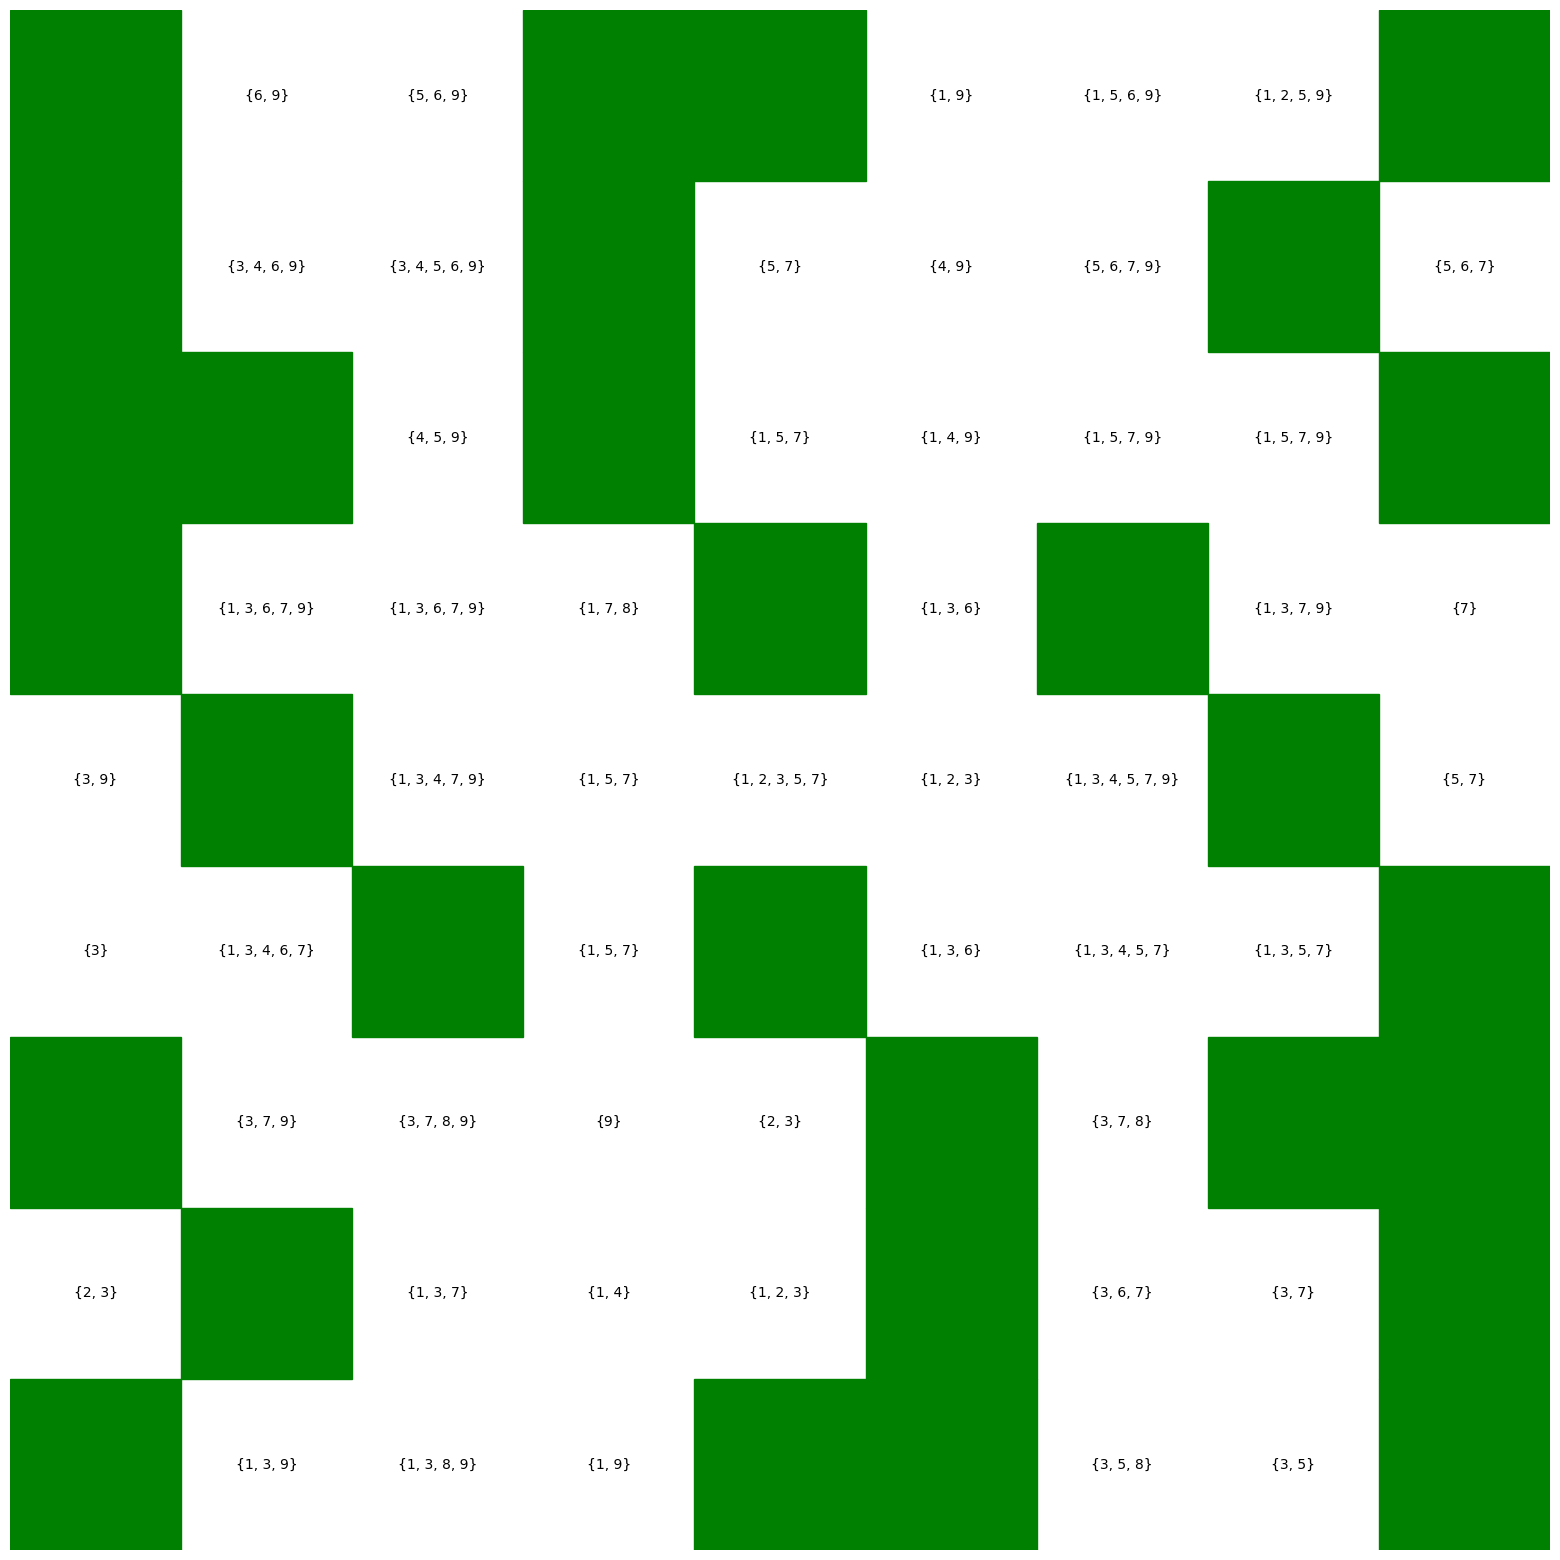

In [24]:
# Plot the constraint grid
# if the particular element is 0, then it is a fixed element, else, display a cloud of possible values
import matplotlib.pyplot as plt
import matplotlib.patches as patches
fig, ax = plt.subplots(figsize=(20, 20))
for i in range(9):
    for j in range(9):
        if fixed_grid[i][j] != 0:
            ax.add_patch(patches.Rectangle((j, i), 1, 1, edgecolor='green', facecolor='green'))
        else:
            ax.text(j + 0.5, i + 0.5, str(constraints_grid[i][j]), ha='center', va='center')
ax.set_xlim(0, 9)
ax.set_ylim(0, 9)
ax.set_aspect('equal')
ax.axis('off')
plt.show()

In [47]:
# Plt using plotly such that hovering over a cell shows the possible values
import plotly.graph_objects as go
fig = go.Figure()
for i in range(9):
    for j in range(9):
        if fixed_grid[i][j] != 0:
            # In a green coloured box, add the fixed value as text inside the box (i.e. the fixed value)
            fig.add_trace(go.Scatter (x=[j, j + 1, j + 1, j, j], y=[i, i, i + 1, i + 1, i], fill='toself', mode='lines', fillcolor='lime', line=dict(color='black'), showlegend=False))
            fig.add_trace(go.Scatter (x=[j + 0.5], y=[i + 0.5], text=str(fixed_grid[i][j]), mode='text', hovertext=str("I am Fixed!"), hoverinfo='text', showlegend=False))

        else:
            # In a blue coloured box, add the possible values as text that are show on hover
            fig.add_trace(go.Scatter (x=[j, j + 1, j + 1, j, j], y=[i, i, i + 1, i + 1, i], fill='toself', mode='lines', fillcolor='skyblue', line=dict(color='black'), showlegend=False))
            fig.add_trace(go.Scatter (x=[j + 0.5], y=[i + 0.5], text=str("?"), mode='text', hovertext=str(constraints_grid[i][j]), hoverinfo='text', showlegend=False))

# Update layout and do not also show the indices
fig.update_layout(width=800, height=800, showlegend=False, xaxis=dict(showticklabels=False), yaxis=dict(showticklabels=False))
# Save
fig.write_html("sudoku_constraints.html")




In [55]:
def plot_grid(fixed_grid, title, constraints_grid):
    """
    Plot the grid with fixed values and the solution
    
    Parameters:
    grid (list): A 9x9 array of integers
    fixed_grid (list): A 9x9 array of integers with fixed values
    title (str): The title of the plot
    """
    
    fig = go.Figure()
    for i in range(9):
        for j in range(9):
            if fixed_grid[i][j] != 0:
                # In a green coloured box, add the fixed value as text inside the box (i.e. the fixed value)
                fig.add_trace(go.Scatter (x=[j, j + 1, j + 1, j, j], y=[i, i, i + 1, i + 1, i], fill='toself', mode='lines', fillcolor='lime', line=dict(color='black'), showlegend=False))
                fig.add_trace(go.Scatter (x=[j + 0.5], y=[i + 0.5], text=str(fixed_grid[i][j]), mode='text', hovertext=str("I am Fixed!"), hoverinfo='text', showlegend=False))

            else:
                # In a blue coloured box, add the possible values as text that are show on hover
                fig.add_trace(go.Scatter (x=[j, j + 1, j + 1, j, j], y=[i, i, i + 1, i + 1, i], fill='toself', mode='lines', fillcolor='skyblue', line=dict(color='black'), showlegend=False))
                fig.add_trace(go.Scatter (x=[j + 0.5], y=[i + 0.5], text=str("?"), mode='text', hovertext=str(constraints_grid[i][j]), hoverinfo='text', showlegend=False))

    # Update layout and do not also show the indices
    fig.update_layout(width=800, height=800, showlegend=False, xaxis=dict(showticklabels=False), yaxis=dict(showticklabels=False))
    fig.update_layout(title=title)

    return fig

In [56]:
# For all the steps in forward checking, store the grid and constraints in an array for iterations = number of zeros
# This will help in creating a gif of the forward checking process


# Forward checking
iterations = sum([1 for row in sudarr for cell in row if cell == 0])

# Store the grid and constraints for each iteration
grids = [np.copy(sudarr)]
constraints_list = [get_constraints(sudarr)]
for i in range(iterations):
    sudarr = forward_checking(sudarr, constraints, 1)
    grids.append(np.copy(sudarr))
    constraints_list.append(get_constraints(sudarr))

    

In [57]:
print(len(grids), len(constraints_list), iterations)

1 1 0


In [58]:
# Plot the fixed grid for the last iteration
fixed_grid = grids[-1]
constraints_grid = [[0 for _ in range(9)] for _ in range(9)]
for cell in constraints_list[-1].keys():
    constraints_grid[cell[0]][cell[1]] = constraints_list[-1][cell]

fig = plot_grid(fixed_grid, "Sudoku with Forward Checking in last iter", constraints_grid)
fig.write_html("sudoku_forward_checking.html")